# Haberman's Survival Exploratory Data Analysis

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

About this file

1. Title: Haberman's Survival Data

2. Sources: (a) Donor: Tjen-Sien Lim (limt@stat.wisc.edu) (b) Date: March 4, 1999

3. Past Usage:<br>

    a.Haberman, S. J. (1976). Generalized Residuals for Log-Linear Models, Proceedings of the 9th International Biometrics Conference, Boston, pp. 104-122.<br>
    b. Landwehr, J. M., Pregibon, D., and Shoemaker, A. C. (1984), Graphical Models for Assessing Logistic Regression Models (with discussion), Journal of the American Statistical Association 79: 61-83.<br>
    c. Lo, W.-D. (1993). Logistic Regression Trees, PhD thesis, Department of Statistics, University of Wisconsin, Madison, WI.<br>
4. Relevant Information: The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

5. Number of Instances: 306

6. Number of Attributes: 4 (including the class attribute)

7. Attribute Information:<br>

    a.Age of patient at time of operation (numerical)<br>
    b.Patient's year of operation (year - 1900, numerical)<br>
    c.Number of positive axillary nodes detected (numerical)<br>
    d.Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year<br>
    
8. Missing Attribute Values: None

**import the necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**import the dataset**

In [2]:
haberman = pd.read_csv('haberman.csv')

**let's see the header of the dataset**

In [3]:
haberman.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


**basic information about the dataset**

In [4]:
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.7 KB


**Observation:** <br> status is a categorical variable so, it can be changed to the categorical variable instead of numerical type(int64).

**statistical information about the dataset**

In [5]:
haberman.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


**Observation:**<br>
1. there is no 'positive axillary nodes' detected for the person whose age is less than 44(25% of total patient).<br>
2. the survival status of 50% patient whose age is less than or eual to 52 is 1. means they survived for 5 years.<br>
3. whoever(patient) is older than 60(years) has more chances to die.

**distribution of the data**

In [6]:
haberman.status.value_counts()

1    225
2     81
Name: status, dtype: int64

**Observation:**<br>
1. the data is imbalanced. So, we might need to do upsampling.

## Univariate Analysis

**let's see the distribution of the age**

Text(0.5, 1.0, 'age distribution')

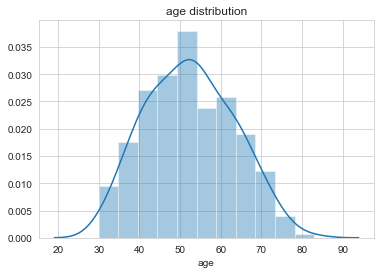

In [7]:
sns.set_style('whitegrid')
sns.distplot(haberman['age'])
# set title
plt.title('age distribution')

> age seems to be normally distributed

**let's see the impact of patient age on the survival status**

Text(0.5, 1, 'Impact of age distribution on survival status')

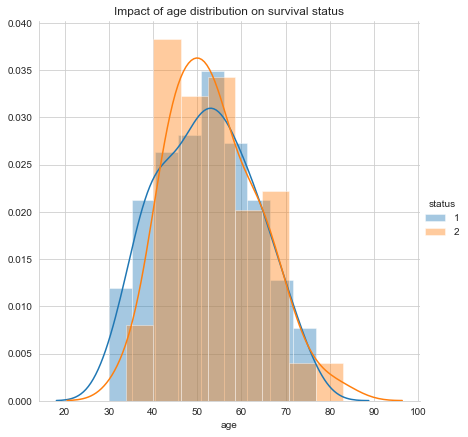

In [8]:
sns.FacetGrid(haberman, hue='status',height=6).map(sns.distplot,'age').add_legend()
plt.title('Impact of age distribution on survival status')

**see the impact of operation year on the survival status**

Text(0.5, 1, 'impact of operation_year on survival status')

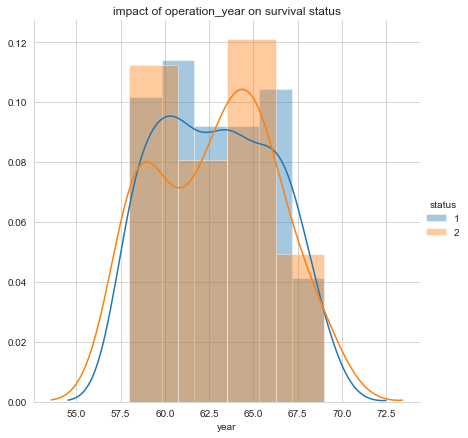

In [9]:
sns.FacetGrid(haberman, hue='status',height=6)\
    .map(sns.distplot,'year').add_legend()
plt.title('impact of operation_year on survival status')

**finally, let's see the impact of positive axillary nodes on survival status.**

Text(0.5, 1, 'positive_axillary_nodes impact on survial_status')

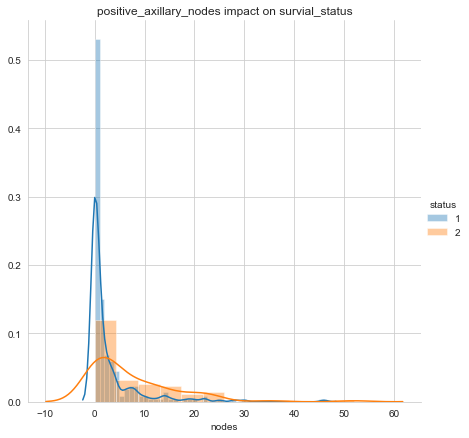

In [10]:
sns.FacetGrid(haberman, hue='status',height=6)\
    .map(sns.distplot,'nodes').add_legend()
plt.title('positive_axillary_nodes impact on survial_status')

# let's do Bivariate Analysis

**let's see the relation between 'age' and 'positive axillary node' detection using scatter plot**<br>
because in the statistical information of data we observed that 25% of patient of age < 44 has no positive axillary node and they survived.


Text(0.5, 1, 'relation between nodes and age')

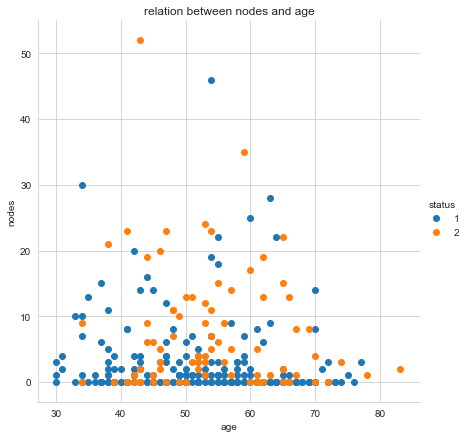

In [11]:
# bivariate analysis
sns.FacetGrid(haberman,hue='status',height=6)\
.map(plt.scatter,'age','nodes').add_legend()
plt.title('relation between nodes and age')

>**we can see in above scatter plot that whose age is less than 44, their survival chance is high. <br> 
> and for no.of positive axillary node <= 5 has more chances to survive.**

**let's see the relation between 'age' and 'operation_year' on survival_status**

Text(0.5, 1, 'year and age relation')

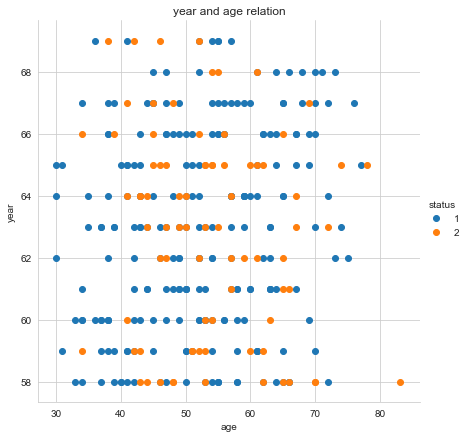

In [12]:
sns.FacetGrid(haberman, hue='status', height=6)\
    .map(plt.scatter, 'age','year').add_legend()
plt.title('year and age relation')

> **there is nothing useful information here, because it is very messy**

### let's see Pair-plot

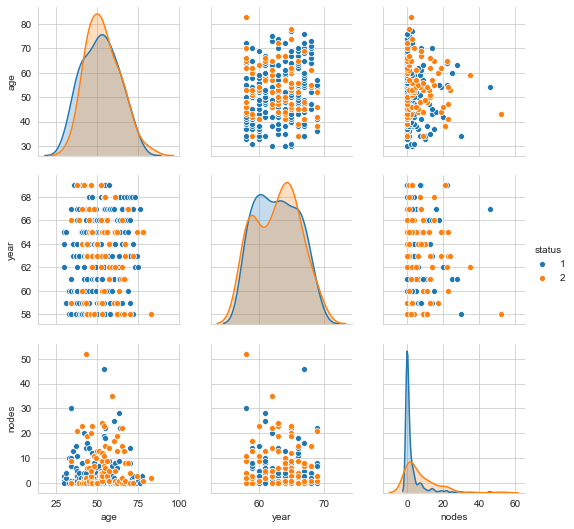

In [13]:
sns.pairplot(haberman,hue='status',vars=['age','year','nodes'])

**Conclusion:**<br>
1. data is very messy so, there is no useful information
2. classification is not useful because it is not easily separable.

## PDF and CDF

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


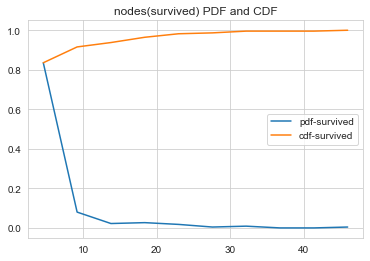

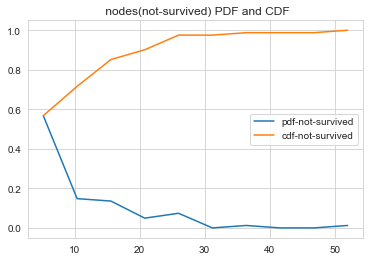

In [19]:
# plot CDF for positive axillary nodes categorised by survival_status

survived = haberman.loc[haberman['status']==1]
not_survived= haberman.loc[haberman['status']==2]

counts, bin_edges = np.histogram(survived['nodes'],bins=10,density = True)

pdf = counts/(sum(counts))

print(pdf);
print(bin_edges);

fig = plt.figure()
ax = plt.subplot()
cdf = np.cumsum(pdf)

ax.plot(bin_edges[1:],pdf,label='pdf-survived');
ax.plot(bin_edges[1:],cdf,label='cdf-survived');

ax.legend()
plt.title('nodes(survived) PDF and CDF')


counts, bin_edges = np.histogram(not_survived['nodes'],bins=10,density = True)

pdf = counts/(sum(counts))

print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)

fig = plt.figure()
ax = plt.subplot()
cdf = np.cumsum(pdf)

ax.plot(bin_edges[1:],pdf,label='pdf-not-survived');
ax.plot(bin_edges[1:],cdf,label='cdf-not-survived');

ax.legend()

# set title
plt.title(' nodes(not-survived) PDF and CDF')
plt.show()

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


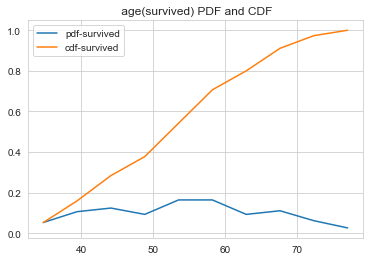

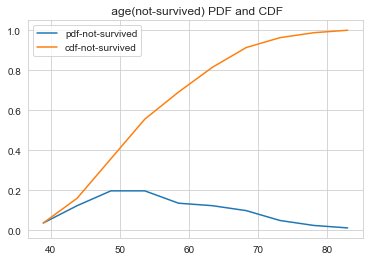

In [22]:
counts, bin_edges = np.histogram(survived['age'],bins=10,density = True)

pdf = counts/(sum(counts))

print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)

fig = plt.figure()
ax = plt.subplot()
cdf = np.cumsum(pdf)

ax.plot(bin_edges[1:],pdf,label='pdf-survived');
ax.plot(bin_edges[1:],cdf,label='cdf-survived');

ax.legend()

# set title
plt.title(' age(survived) PDF and CDF')

counts, bin_edges = np.histogram(not_survived['age'],bins=10,density = True)

pdf = counts/(sum(counts))

print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
fig = plt.figure()
ax = plt.subplot()
cdf = np.cumsum(pdf)

ax.plot(bin_edges[1:],pdf,label='pdf-not-survived');
ax.plot(bin_edges[1:],cdf,label='cdf-not-survived');

ax.legend()

# set title
plt.title(' age(not-survived) PDF and CDF')

plt.show()

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


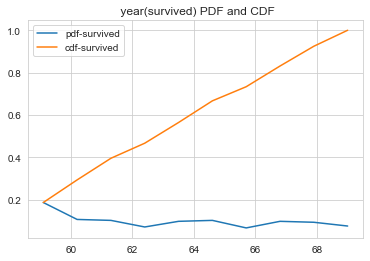

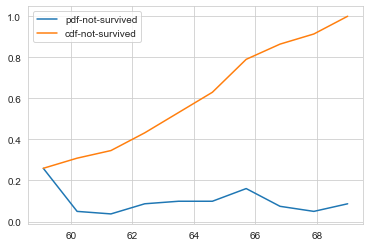

In [23]:
counts, bin_edges = np.histogram(survived['year'],bins=10,density = True)

pdf = counts/(sum(counts))

print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)

fig = plt.figure()
ax = plt.subplot()
cdf = np.cumsum(pdf)

ax.plot(bin_edges[1:],pdf,label='pdf-survived');
ax.plot(bin_edges[1:],cdf,label='cdf-survived');

ax.legend()

# set title
plt.title(' year(survived) PDF and CDF')

counts, bin_edges = np.histogram(not_survived['year'],bins=10,density = True)

pdf = counts/(sum(counts))

print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
fig = plt.figure()
ax = plt.subplot()
cdf = np.cumsum(pdf)

ax.plot(bin_edges[1:],pdf,label='pdf-not-survived');
ax.plot(bin_edges[1:],cdf,label='cdf-not-survived');

ax.legend()

# set title
plt.title(' age(not-survived) PDF and CDF')

plt.title('')
plt.show()

# Box plot and whiskers

Text(0.5, 1.0, 'age impact on survival_status')

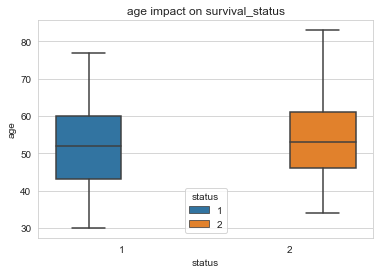

In [24]:
sns.boxplot(x='status',y='age',hue='status',data=haberman)
plt.title('age impact on survival_status')

Text(0.5, 1.0, 'impact of "operation year" on survival_status')

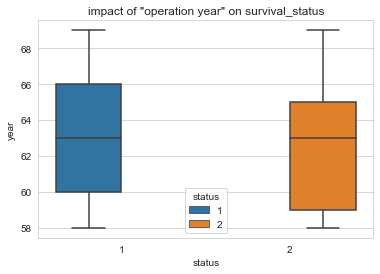

In [25]:
sns.boxplot(x='status',y='year',hue='status',data=haberman)
plt.title('impact of "operation year" on survival_status')

Text(0.5, 1.0, 'impcact of positive axillary nodes on survival status')

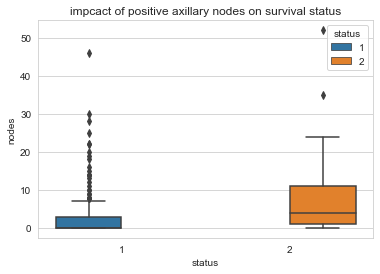

In [26]:
sns.boxplot(x='status',y='nodes',hue='status',data=haberman)
plt.title("impcact of positive axillary nodes on survival status")

**Observation:<br>** there is little bit intuition about 'nodes' feature. other feature very difficult to understand and interpret.

# Violin Plot

Text(0.5, 1.0, 'violin plot of age')

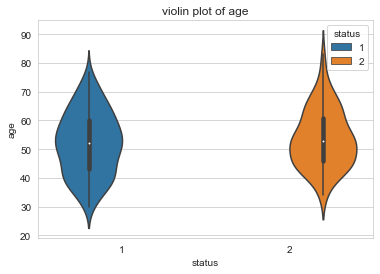

In [28]:
sns.violinplot(x='status',y='age',hue='status',data=haberman)
plt.title('violin plot of age')

Text(0.5, 1.0, 'violin plot of year')

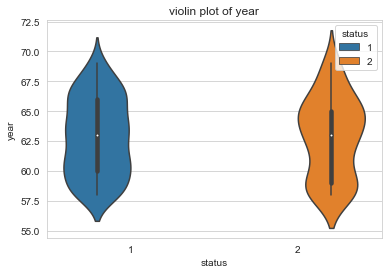

In [29]:
sns.violinplot(x='status',y='year',hue='status',data=haberman)
plt.title('violin plot of year')

Text(0.5, 1.0, 'nodes violin plot')

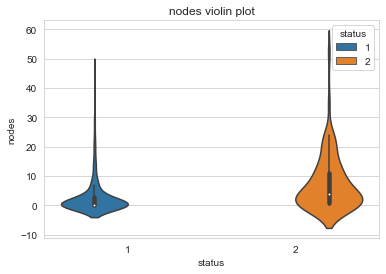

In [30]:
sns.violinplot(x='status',y='nodes',hue='status',data=haberman)
plt.title('nodes violin plot')

<p style="font-family:'Segoe UI';font-size:20px;color:blue">
    <b>Summarizing complete EDA</b><br><br></p>
         <ol style="font-family:'Segoe UI';font-size:16px;color:purple">
             <li>There are very less observations</li>
             <li>Data is Imbalanced. So, there is an option for upsampling the data but still upsampling is not much benificial because we have less observations.</li>
             <li>It is very hard to get Intuition from the given data because there is a lot's of overlapping between survived and not_survived category.</li>
             <li>Data is not linearly separable, even curve fitting is also difficult</li>
             <li>Classification error will be very high</li>
             <li>Simple Machine Learning Algorithm can't handle this classification problem</li>
             <li><b>Some Intuition can be gained from 'nodes' feature</b></li>
        </ol>
        